# 07 Week

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import plotly.express as px
import numpy as np

#### 파생변수

In [5]:
df = pd.DataFrame({'var1' : [4, 3, 8],
                  'var2': [2, 6, 1]})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [6]:
df['varSum'] = df['var1'] + df['var2']
df

,var1,var2,varSum
0,4,2,6
1,3,6,9
2,8,1,9


In [11]:
df['varMean'] = (df['var1'] + df['var2']) / 2
df

,var1,var2,varSum,varMean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


#### mpg 데이터 셋 불러와서 도로 유형 통합 연비 변수 만들기

In [17]:
dfMpg = pd.read_csv('mpg.csv')
dfMpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [19]:
dfMpg['total'] = (dfMpg['cty'] + dfMpg['hwy']) / 2
dfMpg.head() #데이터 일부 출력

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


#### 변수를 추가하고 나면 분석하는데 활용 가능, 통합 연비 변수의 평균을 구하기

In [22]:
sum(dfMpg['total'] / len(dfMpg))

20.14957264957265

In [23]:
dfMpg['total'].mean()

20.14957264957265

#### 조건문을 활용해 파생변수 만들기
##### 1. 기준값 정하기 describe()

In [24]:
dfMpg['total'].describe()

count    234.000000
mean      20.149573
std        5.050290
min       10.500000
25%       15.500000
50%       20.500000
75%       23.500000
max       39.500000
Name: total, dtype: float64

<Axes: ylabel='Frequency'>

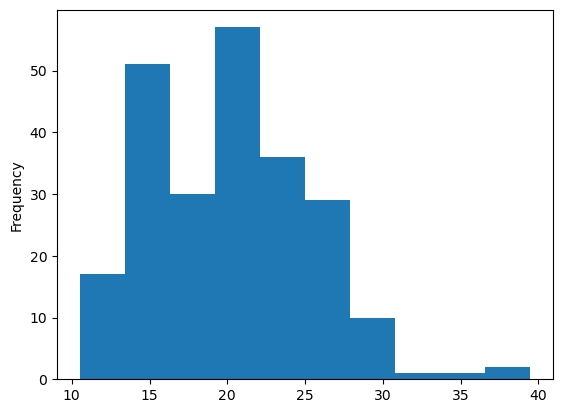

In [32]:
# 히스토그램 그래프 만들기
dfMpg['total'].plot.hist()

##### 2. 합격 판정 변수 만들기
##### numpy에 where() 함수 사용
##### 조건을 찾아 변경, 인덱싱하는 간단한 함수 (Python for문 보다 빠르다함)

In [47]:
dfMpg['test'] = np.where(dfMpg['total'] >= 20, 'pass', 'fail')
dfMpg.head(20)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0,pass
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5,pass
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0,pass
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,20.5,pass
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0,pass


##### 3. 빈도표로 합격 판정 자동차 수 살펴보기
##### value_counts()

In [51]:
dfMpg['test'].value_counts()

pass    128
fail    106
Name: test, dtype: int64

##### 4. 막대 그래프로 빈도 표현하기
##### 막대 그래프의 장점은 변수의 값이 종류별로 얼마나 많은 지 한 눈에 파악할 수 있다.

<Axes: >

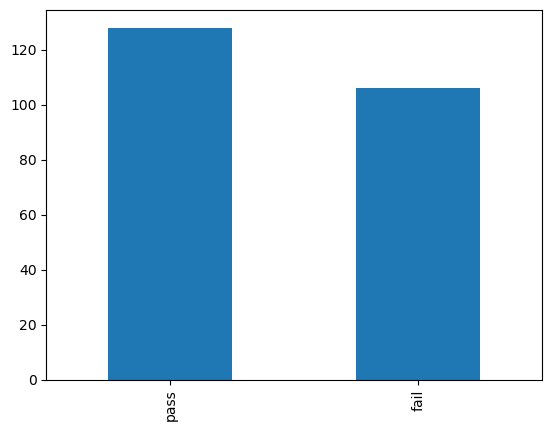

In [54]:
countTest = dfMpg['test'].value_counts()
countTest.plot.bar()

##### 축 이름 수평으로 변경하기 (rotate)

<Axes: >

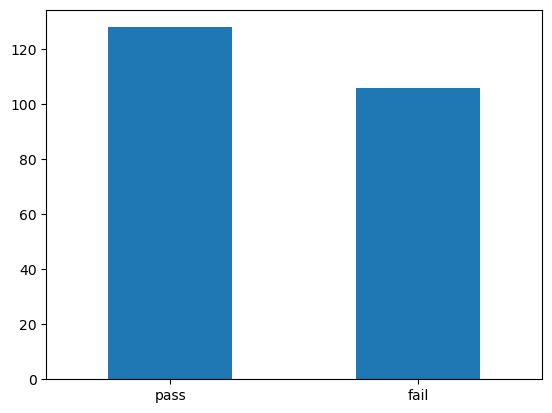

In [55]:
countTest.plot.bar(rot = 0)

#### 중첩 조건문 활용하기
##### 이번에는 A, B, C 세 종류의 연비 등급으로 분류

In [61]:
dfMpg['grade'] = np.where(dfMpg['total'] >= 30, 'A',
                 np.where(dfMpg['total']>= 20, 'B', 'C'))
dfMpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B


##### 2. 빈도표와 막대 그래프로 연비 등급 살펴보기

In [64]:
countGrade = dfMpg['grade'].value_counts()
countGrade

B    118
C    106
A     10
Name: grade, dtype: int64

<Axes: >

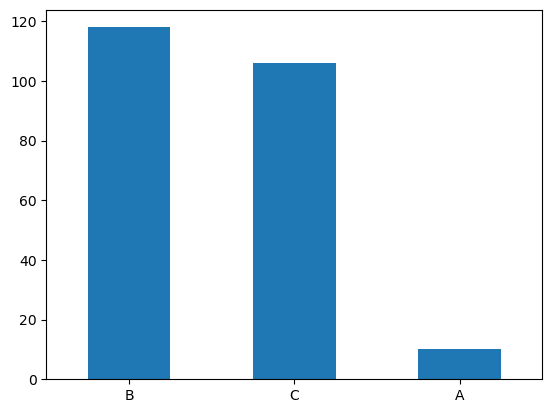

In [66]:
countGrade.plot.bar(rot = 0)

##### 알파벳 순으로 막대 정렬하기
##### 빈도표 변수 만들 때 .sort_index() 해주기, 현재 B C A | 변경 A B C

In [70]:
countGrade = dfMpg['grade'].value_counts().sort_index()
countGrade

A     10
B    118
C    106
Name: grade, dtype: int64

<Axes: >

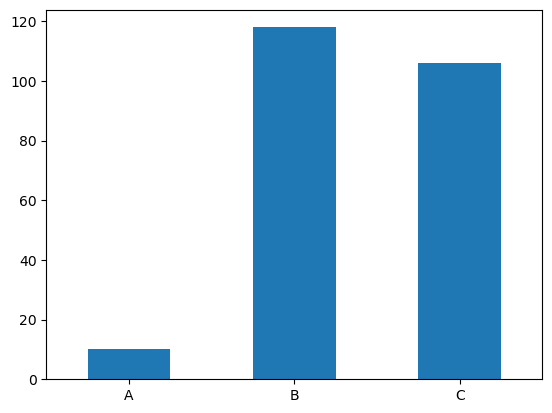

In [71]:
countGrade.plot.bar(rot = 0)

##### 메소드 체이닝 장단점 알아두자

#### 목록에 해당하는 행으로 변수 만들기
##### dfMpg 데이터의 category가 'compact', 'subcompact', '2seater'면 'small'을 부여하고 그렇지 않으면 'large'를 부여한 파생변수 / (OR)을 의미하는 '|' 기호 사용

In [73]:
dfMpg['size'] = np.where((dfMpg['category'] == 'compact') |
                         (dfMpg['category'] == 'subcompact') |
                         (dfMpg['category'] == '2seater'),
                         'small', 'large')
dfMpg['size'].value_counts()

large    147
small     87
Name: size, dtype: int64

##### np.where()에 '또는' 조건이 여러번 반복되는데 이럴 때는 df.isin()을 사용하면 된다.

In [74]:
dfMpg['size'] = np.where(dfMpg['category'].isin(['compact', 'subcompact', '2seater']), 'small', 'large')

dfMpg['size'].value_counts()

large    147
small     87
Name: size, dtype: int64